In [2]:
#API for crypto market website
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '77642e9b-9281-4800-90b2-3af18f713f3b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-09T23:30:38.783Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
#preparing and formating the data
import pandas as pd
pd.set_option('display.max_columns',None)
#This normalizes the data and makes it all pretty in a dataframe
df=pd.json_normalize(data['data'])

df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934191e+07,1.934191e+07,False,NaN,1,NaN,NaN,None,2023-04-09T23:28:00.000Z,28411.163391,1.207255e+10,29.0456,-0.171619,1.559060,1.050304,40.851018,23.848516,65.270824,5.495261e+11,46.2063,5.966344e+11,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,None,2023-04-09T23:28:00.000Z,1864.397700,6.345527e+09,26.7220,-0.236398,0.557210,3.929796,30.304698,12.970254,41.207256,2.245812e+11,18.8891,2.245812e+11,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304
2,825,Tether,USDT,tether,50942,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,NaN,NaN,None,2023-04-09T23:28:00.000Z,1.000591,1.970282e+10,8.9817,0.011067,0.036055,0.031665,-0.261786,0.044579,0.058235,8.025793e+10,6.7503,8.314083e+10,None,2023-04-09T23:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 23:31:10.624304
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578866e+08,1.578866e+08,False,NaN,4,NaN,NaN,None,2023-04-09T23:28:00.000Z,313.324912,4.651259e+08,0.2205,-0.042928,0.781783,-0.091072,12.959984,-4.465346,15.025940,4.946980e+10,4.1592,4.946980e+10,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304
4,3408,USD Coin,USDC,usd-coin,11592,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.999983,2.550325e+09,11.1052,0.012391,0.035106,0.021460,0.033706,-0.010983,-0.002742,3.259992e+10,2.7419,3.259992e+10,None,2023-04-09T23:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 23:31:10.624304
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.506798,5.481641e+08,-7.5988,-0.255698,0.092294,-2.511204,36.623304,27.141272,45.368992,2.619561e+10,2.2024,5.067980e+10,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476613e+10,3.566069e+10,False,NaN,7,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.390237,1.978158e+08,-2.5555,-0.572237,0.983586,2.320460,23.674225,-1.016927,23.464465,1.356704e+10,1.1411,1.756068e+10,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388726e+11,1.388726e+11,False,NaN,8,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.083433,4.534171e+08,-10.4298,-0.337393,2.326294,5.692621,26.771849,-7.503144,10.490251,1.158655e+10,0.9745,1.158655e+10,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+1

In [4]:
#that the main function that grap the data from the website
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '77642e9b-9281-4800-90b2-3af18f713f3b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    pd.set_option('display.max_columns',None)  
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)



    if not os.path.isfile(r'G:\Tableau\Excell\API.csv'):
        df.to_csv(r'G:\Tableau\Excell\API.csv', header='column_names')
    else:
        df.to_csv(r'G:\Tableau\Excell\API.csv', mode='a', header=False)

In [5]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Complited successfully")
    sleep(60)
exit()

{'status': {'timestamp': '2023-04-09T23:32:53.373Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 9124}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10149, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [6]:
df72=pd.read_csv(r'G:\Tableau\Excell\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.934191e+07,1.934191e+07,False,NaN,1,NaN,NaN,NaN,2023-04-09T23:28:00.000Z,28411.163391,1.207255e+10,29.0456,-0.171619,1.559060,1.050304,40.851018,23.848516,65.270824,5.495261e+11,46.2063,5.966344e+11,NaN,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaN
1,1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,NaN,2023-04-09T23:28:00.000Z,1864.397700,6.345527e+09,26.7220,-0.236398,0.557210,3.929796,30.304698,12.970254,41.207256,2.245812e+11,18.8891,2.245812e+11,NaN,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaN
2,2,825,Tether,USDT,tether,50942,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-09T23:28:00.000Z,1.000591,1.970282e+10,8.9817,0.011067,0.036055,0.031665,-0.261786,0.044579,0.058235,8.025793e+10,6.7503,8.314083e+10,NaN,2023-04-09T23:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 23:31:10.624304,NaN
3,3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578866e+08,1.578866e+08,False,NaN,4,NaN,NaN,NaN,2023-04-09T23:28:00.000Z,313.324912,4.651259e+08,0.2205,-0.042928,0.781783,-0.091072,12.959984,-4.465346,15.025940,4.946980e+10,4.1592,4.946980e+10,NaN,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaN
4,4,3408,USD Coin,USDC,usd-coin,11592,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,NaN,NaN,NaN,2023-04-09T23:28:00.000Z,0.999983,2.550325e+09,11.1052,0.012391,0.035106,0.021460,0.033706,-0.010983,-0.002742,3.259992e+10,2.7419,3.259992e+10,NaN,2023-04-09T23:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 23:31:10.624304,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,10,6636,Polkadot,DOT,polkadot-new,495,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.174624e+09,1.301103e+09,False,NaN,11,NaN,NaN,NaN,2023-04-09T23:33:00.000Z,6.223865,1.303599e+08,9.1644,-0.518097,1.269646,-0.853266,11.973573,-7.783798,27.508661,7.310699e+09,0.6154,8.097886e+09,NaN,2023-04-09T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:34:56.548913
131,11,4687,Binance USD,BUSD,binance-usd,6559,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,7.070499e+09,7.070499e+09,False,NaN,12,NaN,NaN,NaN,2023-04-09T23:33:00.000Z,0.999801,2.329273e+09,-7.9214,-0.026905,-0.004438,0.005775,0.141955,-0.009865,-0.023068,7.069093e+09,0.5949,7.069093e+09,NaN,2023-04-09T23:33:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,NaN,2023-04-09 23:34:56.548913
132,12,2,Litecoin,LTC,litecoin,900,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",84000000.0,7.267019e+07,8.400000e+07,False,NaN,13,NaN,NaN,NaN,2023-04-09T23:33:00.000Z,90.843042,3.120952e+08,-2.8558,-0.109484,0.854903,-2.477883,25.991440,-8.373933,

In [8]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19341906.00000,19341906.00000,False,NaN,1,NaN,NaN,None,2023-04-09T23:28:00.000Z,28411.16339,12072552453.05618,29.04560,-0.17162,1.55906,1.05030,40.85102,23.84852,65.27082,549526051651.99329,46.20630,596634431203.00000,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaT
1,1027,Ethereum,ETH,ethereum,6711,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,None,2023-04-09T23:28:00.000Z,1864.39770,6345526852.02874,26.72200,-0.23640,0.55721,3.92980,30.30470,12.97025,41.20726,224581200512.54257,18.88910,224581200512.54001,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaT
2,825,Tether,USDT,tether,50942,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80210538011.07312,83091735571.85529,False,NaN,3,NaN,NaN,None,2023-04-09T23:28:00.000Z,1.00059,19702822969.02996,8.98170,0.01107,0.03606,0.03167,-0.26179,0.04458,0.05823,80257926673.78532,6.75030,83140826456.03000,None,2023-04-09T23:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 23:31:10.624304,NaT
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157886570.22571,157886570.22571,False,NaN,4,NaN,NaN,None,2023-04-09T23:28:00.000Z,313.32491,465125856.41626,0.22050,-0.04293,0.78178,-0.09107,12.95998,-4.46535,15.02594,49469795784.08936,4.15920,49469795784.09000,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaT
4,3408,USD Coin,USDC,usd-coin,11592,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32600464084.02985,32600464084.02985,False,NaN,5,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.99998,2550324994.87285,11.10520,0.01239,0.03511,0.02146,0.03371,-0.01098,-0.00274,32599919082.87448,2.74190,32599919082.87000,None,2023-04-09T23:28:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 23:31:10.624304,NaT
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.50680,548164087.23038,-7.59880,-0.25570,0.09229,-2.51120,36.62330,27.14127,45.36899,26195611794.37374,2.20240,50679796462.26000,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaT
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34766128691.87300,35660688966.54200,False,NaN,7,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.39024,197815843.41614,-2.55550,-0.57224,0.98359,2.32046,23.67422,-1.01693,23.46446,13567039687.92268,1.14110,17560677847.32000,None,2023-04-09T23:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 23:31:10.624304,NaT
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138872636383.70520,138872636383.70520,False,NaN,8,NaN,NaN,None,2023-04-09T23:28:00.000Z,0.08343,453417117.29125,-10.42980,-0.33739,2.32629,5.69262,26.77185,-7.50314,10.49025,11586554907.05531,0.97450,11586554907.060

In [10]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.25696,1.48479,0.91671,40.65085,23.74699,65.13488
Ethereum,-0.33133,0.53755,3.84501,30.19559,12.91316,41.14479
Tether,-0.00166,0.01183,0.02574,-0.26450,0.03583,0.04873
BNB,-0.11266,0.76337,-0.14273,12.91412,-4.49787,15.00323
USD Coin,0.00319,0.01310,0.01801,0.01528,-0.01628,-0.01068
XRP,-0.32610,0.05463,-2.59990,36.49729,27.06173,45.28501
Cardano,-0.62993,0.97277,2.27956,23.57469,-1.06742,23.53133
Dogecoin,-0.39619,2.33660,5.56958,26.70128,-7.54060,10.47762
Polygon,-0.38773,-0.08025,0.56345,4.37042,-15.66723,31.07715


In [11]:
df4=df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h    -0.25696
         quote.USD.percent_change_24h    1.48479
         quote.USD.percent_change_7d     0.91671
         quote.USD.percent_change_30d   40.65085
         quote.USD.percent_change_60d   23.74699
                                          ...   
TRON     quote.USD.percent_change_24h    0.65725
         quote.USD.percent_change_7d     1.98104
         quote.USD.percent_change_30d   16.12358
         quote.USD.percent_change_60d   -0.42826
         quote.USD.percent_change_90d   22.31336
Length: 90, dtype: float64

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.25696
        quote.USD.percent_change_24h  1.48479
        quote.USD.percent_change_7d   0.91671
        quote.USD.percent_change_30d 40.65085
        quote.USD.percent_change_60d 23.74699
...                                       ...
TRON    quote.USD.percent_change_24h  0.65725
        quote.USD.percent_change_7d   1.98104
        quote.USD.percent_change_30d 16.12358
        quote.USD.percent_change_60d -0.42826
        quote.USD.percent_change_90d 22.31336

[90 rows x 1 columns]

In [15]:
df5.count()

values    90
dtype: int64

In [18]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it
index=pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25696
1,Bitcoin,quote.USD.percent_change_24h,1.48479
2,Bitcoin,quote.USD.percent_change_7d,0.91671
3,Bitcoin,quote.USD.percent_change_30d,40.65085
4,Bitcoin,quote.USD.percent_change_60d,23.74699
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.65725
86,TRON,quote.USD.percent_change_7d,1.98104
87,TRON,quote.USD.percent_change_30d,16.12358
88,TRON,quote.USD.percent_change_60d,-0.42826


In [25]:
# Change the column nam
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.25696
1,Bitcoin,quote.USD.percent_change_24h,1.48479
2,Bitcoin,quote.USD.percent_change_7d,0.91671
3,Bitcoin,quote.USD.percent_change_30d,40.65085
4,Bitcoin,quote.USD.percent_change_60d,23.74699
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.65725
86,TRON,quote.USD.percent_change_7d,1.98104
87,TRON,quote.USD.percent_change_30d,16.12358
88,TRON,quote.USD.percent_change_60d,-0.42826


In [32]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.25696
1,Bitcoin,24h,1.48479
2,Bitcoin,7d,0.91671
3,Bitcoin,30d,40.65085
4,Bitcoin,60d,23.74699
...,...,...,...
85,TRON,24h,0.65725
86,TRON,7d,1.98104
87,TRON,30d,16.12358
88,TRON,60d,-0.42826


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

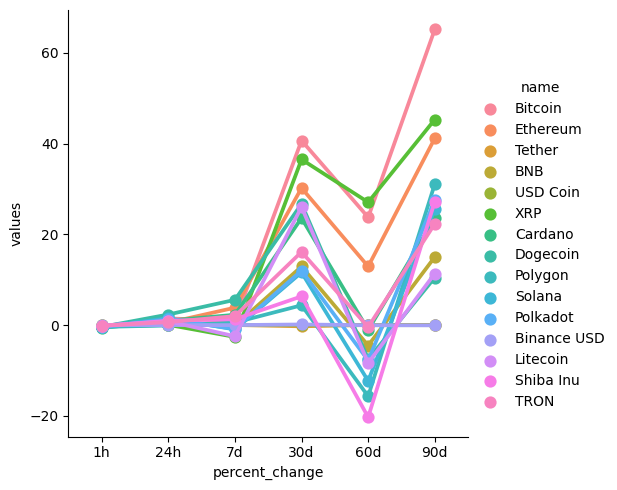

In [34]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name' , data = df7 , kind = 'point')

In [42]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df8=df[['name','quote.USD.price','timestamp']]
df8=df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,28411.16339,2023-04-09 23:31:10.624304
0,Bitcoin,28376.85934,NaT
0,Bitcoin,28373.23493,NaT
0,Bitcoin,28370.63608,NaT


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

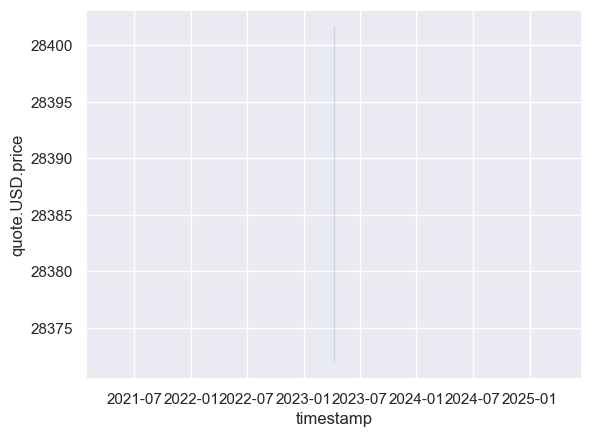

In [43]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)